In [72]:
import os
import requests
import json
import pandas as pd
import seaborn
import matplotlib.pyplot as plt
from datetime import date,datetime
import calendar
import seaborn as sns
def get_df(url):
    resp = requests.get(url)
    data = resp.json().get('objects')
    return pd.DataFrame(data)
station_url = "http://hubwaydatachallenge.org/api/v1/station/?\
format=json&username=sambapython&api_key=1a82d1609be7f3f49e6e493d0779cbb5ec634423"
trip_url = "http://hubwaydatachallenge.org/api/v1/trip/?format=json&username=\
sambapython&api_key=1a82d1609be7f3f49e6e493d0779cbb5ec634423&duration__gt=\
3600&start_station=33&start_date__gte=2011-01-01&end_date__lte=2011-08-31"
station_capacity_url = "http://hubwaydatachallenge.org/api/v1/stationcapacity/?\
format=json&username=sambapython&api_key=1a82d1609be7f3f49e6e493d0779cbb5ec634423&"
station_status_url = "http://hubwaydatachallenge.org/api/v1/stationstatus/?\
format=json&username=sambapython&api_key=1a82d1609be7f3f49e6e493d0779cbb5ec634423&station=33"
df_stations = get_df(station_url)
df_stations.to_csv("stations.csv")
df_trips = get_df(trip_url)
df_trips.to_csv("trips.csv")
df_station_capacity = get_df(station_capacity_url)
df_station_capacity.to_csv("stationcapacity.csv")
# df_station_status = get_df(station_status_url)
# df_station_status.to_csv("stationstatus.csv")
df_stations['installdate'].fillna('2013',inplace=True)
df_stations['year']=map(lambda x:x[:4],df_stations['installdate'].values)
count_stations_year=  df_stations.groupby('year').count()

df_trips['time']=map(lambda x:x[-8:-6], df_trips['end_date'].values)
trip_count_time = df_trips.groupby('time').count()
df_trips['weekday'] = pd.to_datetime(df_trips['end_date']).dt.dayofweek
weekend_trip_count_time = df_trips[df_trips['weekday'].isin([5,6])].groupby('time').mean()
weekday_trip_count_time = df_trips[df_trips['weekday'].isin([0,1,2,3,4])].groupby('time').mean()

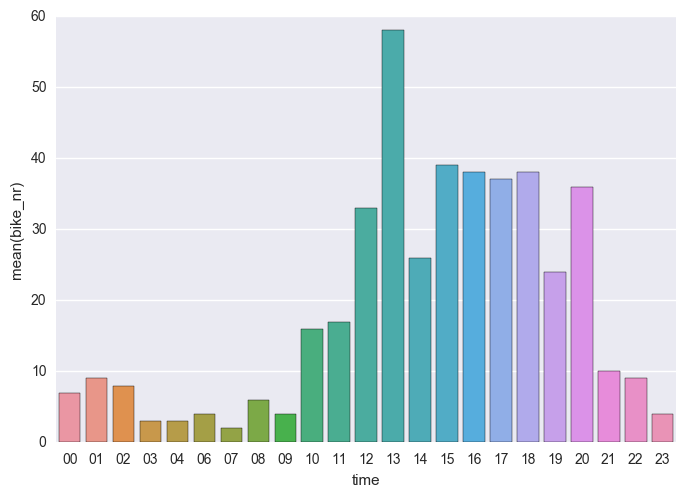

In [5]:
import os
import requests
import json
import pandas as pd
import seaborn
import matplotlib.pyplot as plt
from datetime import date,datetime
import calendar
import seaborn as sns
def get_df(url):
    resp = requests.get(url)
    data = resp.json().get('objects')
    return pd.DataFrame(data)
trip_url = "http://hubwaydatachallenge.org/api/v1/trip/?format=json&username=\
sambapython&api_key=1a82d1609be7f3f49e6e493d0779cbb5ec634423&start_date__gte=2011-01-01&end_date__lte=2013-08-31&limit=10000&duration__gt=\
3600&start_station=33"
df_trips = get_df(trip_url)
df_trips.to_csv("trips.csv")
df_trips['time']=map(lambda x:x[-8:-6], df_trips['end_date'].values)
trip_count_time = df_trips.groupby('time').count()
df_trips['weekday'] = pd.to_datetime(df_trips['end_date']).dt.dayofweek
weekend_trip_count_time = df_trips[df_trips['weekday'].isin([5,6])].groupby('time').count()
weekday_trip_count_time = df_trips[df_trips['weekday'].isin([0,1,2,3,4])].groupby('time').count()
sns.barplot(data=weekday_trip_count_time,y='bike_nr',x=weekday_trip_count_time.index);
plt.show()

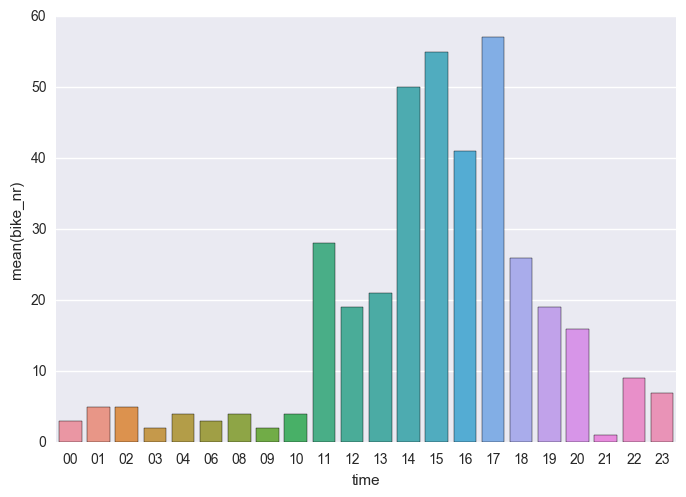

In [6]:
sns.barplot(data=weekend_trip_count_time,y='bike_nr',x=weekend_trip_count_time.index);
plt.show()

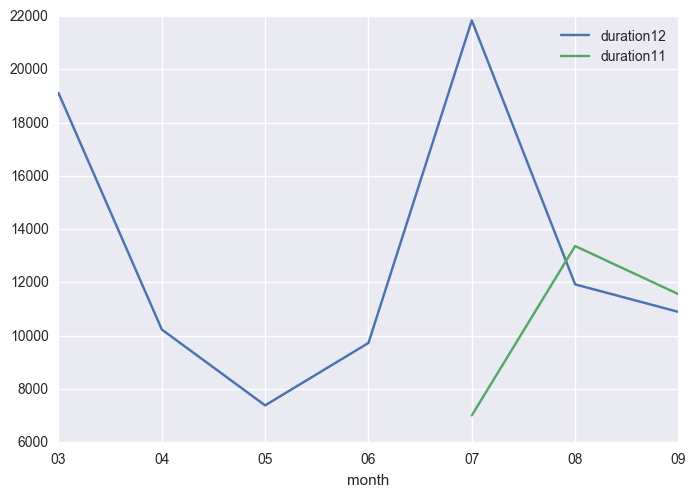

'\nsns.kdeplot(gender_count_2011[\'duration\'], shade=True, color="r")\nsns.kdeplot(gender_count_2012[\'duration\'], shade=True, color="g")\nplt.show()\n'

In [9]:
def get_data_year(start,end):
    trip_url = "http://hubwaydatachallenge.org/api/v1/trip/?format=json&username=\
sambapython&api_key=1a82d1609be7f3f49e6e493d0779cbb5ec634423&duration__gt=\
3600&start_station=33&start_date__gte={0}&end_date__lte={1}&limit=10000".format(start, end)
    df_trips = get_df(trip_url)
    df_trips.to_csv("trips{0}.csv".format(start))
    df_trips['month'] = map(lambda x:x[5:7],df_trips['end_date'].values)
    df_trips_gender=df_trips.groupby('month').mean()
    return df_trips_gender
gender_count_2012 = get_data_year('2012-01-01','2012-12-30')
gender_count_2011 = get_data_year('2011-01-01','2011-12-30')
res = gender_count_2012
res['duration12']=gender_count_2012['duration']
res['duration11'] = gender_count_2011['duration']
sns.set_style("darkgrid")
res[['duration12','duration11']].plot()
plt.show()
'''
sns.kdeplot(gender_count_2011['duration'], shade=True, color="r")
sns.kdeplot(gender_count_2012['duration'], shade=True, color="g")
plt.show()
'''


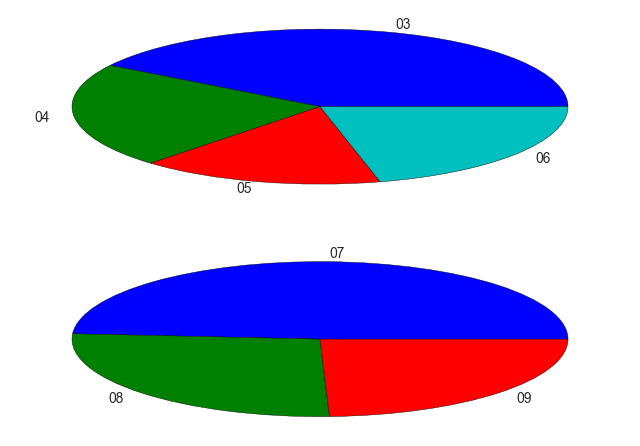

In [11]:
def get_data_year(year1,year2):
    trip_url = "http://hubwaydatachallenge.org/api/v1/trip/?format=json&username=\
sambapython&api_key=1a82d1609be7f3f49e6e493d0779cbb5ec634423&duration__gt=\
3600&start_station=33&start_date__gte={0}&end_date__lte={1}&limit=10000".format(year1, year2)
    df_trips = get_df(trip_url)
    df_trips.to_csv("trips{0}.csv".format(year1))
    df_trips['month'] = map(lambda x:x[5:7],df_trips['end_date'].values)
    df_trips_gender=df_trips.groupby('month').mean()
    return df_trips_gender
gender_count_2012f = get_data_year('2012-01-01','2012-06-30')
gender_count_2012s = get_data_year('2012-07-01','2012-12-31')
fig = plt.figure()
fig.add_subplot(211)
plt.pie(gender_count_2012f['duration'],labels=gender_count_2012f.index)
fig.add_subplot(212)
plt.pie(gender_count_2012s['duration'],labels=gender_count_2012s.index)
plt.show()

In [70]:

trip_url = "http://hubwaydatachallenge.org/api/v1/trip/?format=json&username=\
sambapython&api_key=1a82d1609be7f3f49e6e493d0779cbb5ec634423&limit=10000&birth_date!=''"
df_trips = get_df(trip_url)
df_trips.to_csv("trips3.csv")
df_trips['age'] = map(lambda x:2017-x,df_trips['birth_date'])
age_group=[]
for age in df_trips['age'].values:
    if age>50:
        age_group.append('50+')
    elif age>40 and age<50:
        age_group.append("40-50")
    elif age>30 and age<40:
        age_group.append("30-40")
    else:
        age_group.append("-30")
df_trips['age_groups']=age_group

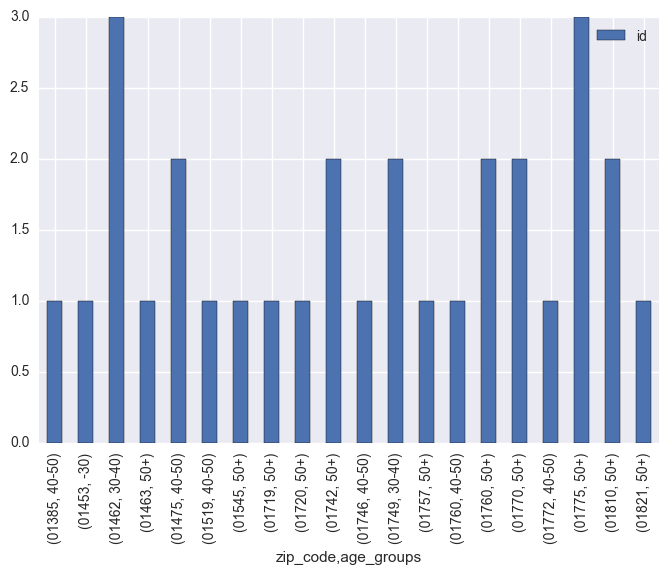

In [76]:
df_trips.groupby(['age_groups','']).count()[['id']].head(20).plot.bar(stacked=True)
plt.show()